# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [2]:
# show first 10 rows of city_data_df
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [3]:
# show first 10 rows of ride_data_df
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


### Merge the DataFrames

In [4]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [5]:
#  1. Get the total rides for each city type

# A. Create DataFrame for each type of city
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

#B. Get the number of rides for urban cities.
sum_urban_ride_count = urban_cities_df.count()["ride_id"]

#C. Get number of rides for suburban cities.
sum_suburban_ride_count = suburban_cities_df.count()["ride_id"]

#D. Get number of rides for rural cities (which is an oxymoron).
sum_rural_ride_count = rural_cities_df.count()["ride_id"]

# Print results so I feel better 
print (sum_urban_ride_count, sum_suburban_ride_count, sum_rural_ride_count)


1625 625 125


In [6]:
# 2. Get the total drivers for each city type
sum_drivers_urban = city_data_df[city_data_df["type"] == "Urban"].sum()["driver_count"]
sum_drivers_suburban = city_data_df[city_data_df["type"] == "Suburban"].sum()["driver_count"]
sum_drivers_rural = city_data_df[city_data_df["type"] =="Rural"].sum()["driver_count"]

# Print results so I feel better 
print(sum_drivers_urban, sum_drivers_suburban, sum_drivers_rural)


2405 490 78


In [7]:
#  3. Get the total amount of fares for each city type
sum_fares_urban = (round(urban_cities_df.sum()["fare"],2))
sum_fares_suburban = (round(suburban_cities_df.sum()["fare"],2))
sum_fares_rural = (round(rural_cities_df.sum()["fare"],2))

# Print results so I feel better 
print(sum_fares_urban, sum_fares_suburban, sum_fares_rural)

39854.38 19356.33 4327.93


In [8]:
#  4. Get the average fare per ride for each city type. 
urban_avg_fare = (round(urban_cities_df.mean()["fare"],2))
suburban_avg_fare = (round(suburban_cities_df.mean()["fare"],2))
rural_avg_fare = (round(rural_cities_df.mean()["fare"],2))

# Print results so I feel better 
print(urban_avg_fare ,suburban_avg_fare, rural_avg_fare)


24.53 30.97 34.62


C:\Users\Mother\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
C:\Users\Mother\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Mother\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing t

In [9]:
# 5. Get the average fare per driver for each city type. 
urban_avg_fare_per_driver = (round(sum_fares_urban / sum_drivers_urban, 2))
suburban_avg_fare_per_driver = (round(sum_fares_suburban / sum_drivers_suburban,2))
rural_avg_fare_per_driver = (round(sum_fares_rural / sum_drivers_rural,2))

# Print results so I feel better 
print(urban_avg_fare_per_driver, suburban_avg_fare_per_driver, rural_avg_fare_per_driver)


16.57 39.5 55.49


In [10]:
#  6. Create a PyBer summary DataFrame. 

# initialize list of lists
data=[['Urban', sum_urban_ride_count, sum_drivers_urban, sum_fares_urban, urban_avg_fare, urban_avg_fare_per_driver],
      ['Suburban', sum_suburban_ride_count, sum_drivers_suburban, sum_fares_suburban, suburban_avg_fare, suburban_avg_fare_per_driver],
      ['Rural', sum_rural_ride_count, sum_drivers_rural, sum_fares_rural, rural_avg_fare, rural_avg_fare_per_driver]]

#Create Dataframe
PyBer_Summary_df = pd.DataFrame(data, columns=['Type', '# of Rides', '# of Drivers', 'Total $ Fares', 'Avg Fare/Ride', 'Avg Fare/Driver'])

#Print Dataframe
PyBer_Summary_df


,Type,# of Rides,# of Drivers,Total $ Fares,Avg Fare/Ride,Avg Fare/Driver
0,Urban,1625,2405,39854.38,24.53,16.57
1,Suburban,625,490,19356.33,30.97,39.50
2,Rural,125,78,4327.93,34.62,55.49


In [11]:
#  7. Cleaning up the DataFrame. Delete the index name
PyBer_Summary_df.set_index('Type', inplace=True)

In [12]:
#  8. Format the columns.
PyBer_Summary_df["Total $ Fares"]=PyBer_Summary_df["Total $ Fares"].map("${:,.2f}".format)
PyBer_Summary_df["Avg Fare/Ride"]=PyBer_Summary_df["Avg Fare/Ride"].map("${:,.2f}".format)
PyBer_Summary_df["Avg Fare/Driver"]=PyBer_Summary_df["Avg Fare/Driver"].map("${:,.2f}".format)
PyBer_Summary_df["# of Rides"]=PyBer_Summary_df["# of Rides"].map("{:,}".format)
PyBer_Summary_df["# of Drivers"]=PyBer_Summary_df["# of Drivers"].map("{:,}".format)

#Print Dataframe
PyBer_Summary_df

,# of Rides,# of Drivers,Total $ Fares,Avg Fare/Ride,Avg Fare/Driver
Type,,,,,
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57
Suburban,625,490,"$19,356.33",$30.97,$39.50
Rural,125,78,"$4,327.93",$34.62,$55.49


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [13]:
# 1. Read the merged DataFrame
#It is already in from Deliverable 1

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [14]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fare_and_time_df = pyber_data_df.groupby(['type','date']).sum()['fare']

fare_and_time_df


type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [15]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()

fare_and_time_df = fare_and_time_df.reset_index()

fare_and_time_df

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [16]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

date_pivot= fare_and_time_df.pivot(index="date", columns="type", values="fare")
date_pivot.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [17]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

Jan_Apr_df=date_pivot.loc["2019-01-01" : "2019-04-29"]

In [18]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

Jan_Apr_df.index = pd.to_datetime(Jan_Apr_df.index)

In [19]:
# 7. Check that the datatype for the index is datetime using df.info()
Jan_Apr_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [20]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
resampled_week_df=Jan_Apr_df.resample("w").sum()

In [21]:
resampled_week_df


type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


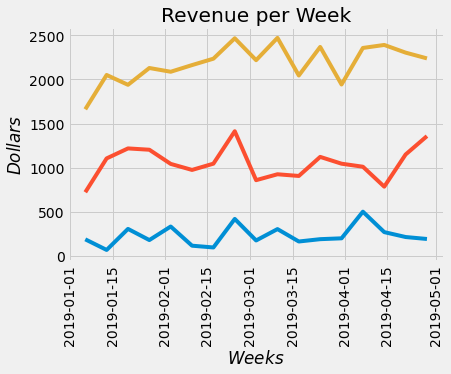

<Figure size 432x288 with 0 Axes>

In [22]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

plt.plot(resampled_week_df)
plt.title("Revenue per Week")
plt.xlabel("$Weeks$")
plt.xticks(rotation=90)
plt.ylabel("$Dollars$")


plt.show()
plt.tight_layout()

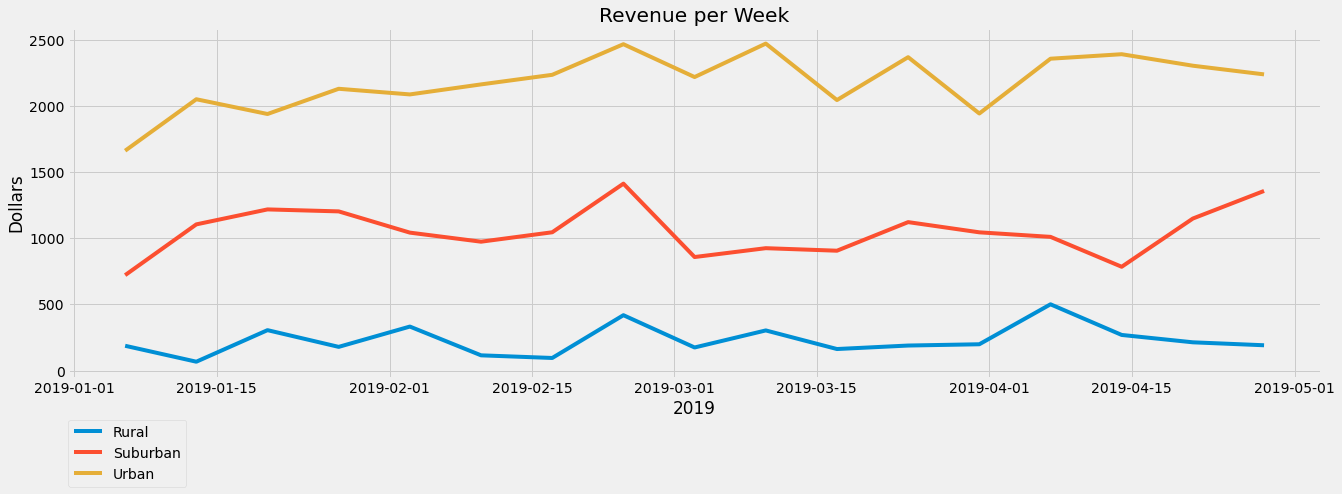

In [31]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(20,6))

ax.plot(resampled_week_df)
ax.set(title="Revenue per Week",
        xlabel="2019",
        ylabel="Dollars")

       # xticklabels=("Jan", " ", "Feb", " ", "March", " ", "April"))





ax.legend(resampled_week_df.columns, bbox_to_anchor=(0.1, -0.1))

